<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_Heat-TreesPHL/blob/main/Final_Models_Regressions_Correlation_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Influence of spatial distribution of trees on micro (local) heat vulnerability in Philadelphia and relationship on chronic diseases

**Abstract**: This project was aimed at assessing the importance of urban tree distribution in addressing effects of a great phenomenon known as Urban Heat Island (UHI). UHI is a kind of heat accumulation phenomenon within urban areas due to urban construction and human activities. These affect most cities including the City of Philadelphia, PA. Therefore, distribution of UHI and how trees contribute to its cooling effect is vital to the well-being of the city residents since this have influence on chronic diseases of residents. This analysis used linear regression, Correlation and Random Forest machine learning techniques to understand the relationship between the spatial distributions of trees in the neighborhood and heating vulnerability. HVI Score and Number pf trees was also be used to predict health factors in Philadelphia such as diabetes and blood pressure.

**Data:** Was collected at the census tract level

**1. Heat Vulnerability by Census Tract**  for 2017-2019 were obtained from **Open Data Philly** through the URL https://www.opendataphilly.org/dataset?q=Heat+Vulnerability+by+Census+Tract

**2. Philadelphia Tree Inventory** for 2021 were obtained from **Open Data Philly** through the URL https://www.opendataphilly.org/dataset/philadelphia-tree-inventory 

**3. Health factor variables** were obtained from the CDC 500 Cities dataset: https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

> Arthritis: Percentage of population with arthritis

> Binge_Drinking: Percentage of population who binge drinks

> Blood_Pressure: Percentage of population with high blood pressure

> Cancer: Percentage of the population with cancer

> Heart_Disease: Percentage of the population with coronary heart disease

> Pulmonary_Disease: Percentage of the population with chronic pulmonary diease

> Diabetes: Percentage of the population with diabetes

> Sleep: Percentage of the population getting less than 7 hours of sleep

> Stroke: Percentage of the population experiencing strokes

> Obesity: Percentage of the population with obesity

> Smoking: Percentage of the population who smokes cigarettes 

**NOTE: Not all these attributes were used, But only the choosen chronic disease attributes**


**Install and import packages**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')

#Files from the drive
ct_tree_file = "/content/drive/Shareddrives/PUS2022/Heat_Trees_project/ct_trees.csv"
heat_file = "/content/drive/Shareddrives/PUS2022/Heat_Trees_project/heat.csv"

ct_tree = pd.read_csv(ct_tree_file)
heat = pd.read_csv(heat_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

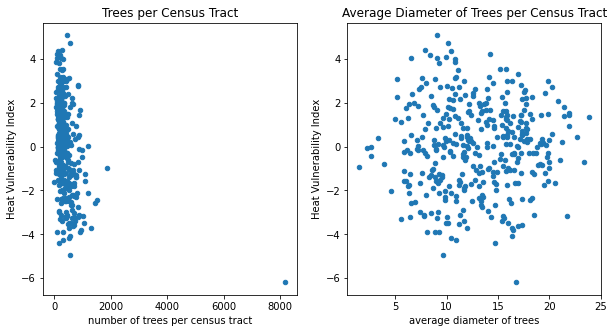

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
heat.plot("num_trees", "HVI_SCORE", kind="scatter",ax=ax[0])
ax[0].set_xlabel("number of trees per census tract")
ax[0].set_ylabel("Heat Vulnerability Index")
heat.plot("ave_dbh", "HVI_SCORE", kind="scatter", ax=ax[1])
ax[1].set_xlabel("average diameter of trees")
ax[1].set_ylabel("Heat Vulnerability Index")
ax[0].set_title('Trees per Census Tract')
ax[1].set_title('Average Diameter of Trees per Census Tract')


fig.show()

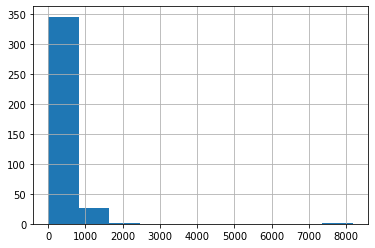

In [ ]:
heat.num_trees.hist()
#there is an important outlier

In [ ]:
#removing outliers
heat = heat[heat['num_trees']<3000]

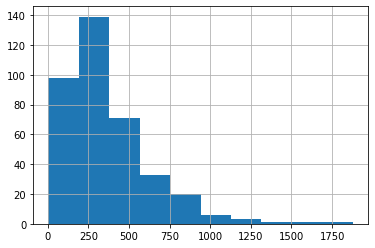

In [ ]:
heat.num_trees.hist()


In [ ]:
#calculating the log of the variables
heat["log_num_trees"] = np.log10(heat.num_trees)
heat["log_ave_dbh"] = np.log10(heat.ave_dbh);
heat["dbh_trees"] = heat["ave_dbh"] * heat["num_trees"]

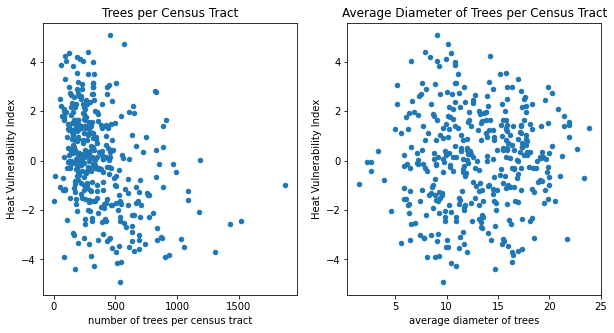

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
heat.plot("num_trees", "HVI_SCORE", kind="scatter",ax=ax[0])
ax[0].set_xlabel("number of trees per census tract")
ax[0].set_ylabel("Heat Vulnerability Index")
heat.plot("ave_dbh", "HVI_SCORE", kind="scatter", ax=ax[1])
ax[1].set_xlabel("average diameter of trees")
ax[1].set_ylabel("Heat Vulnerability Index")
ax[0].set_title('Trees per Census Tract')
ax[1].set_title('Average Diameter of Trees per Census Tract')


fig.show()

In [ ]:
X = heat[['num_trees']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     59.01
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.41e-13
Time:                        13:47:41   Log-Likelihood:                -754.60
No. Observations:                 373   AIC:                             1513.
Df Residuals:                     371   BIC:                             1521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0749      0.166      6.478      0.0

Number of trees per zip code explains 13.7% of the variation of the 

In [ ]:
X = heat[['ave_dbh']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#The average DBH does not explain the variations of HVI. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4919
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.484
Time:                        13:47:41   Log-Likelihood:                -781.88
No. Observations:                 373   AIC:                             1568.
Df Residuals:                     371   BIC:                             1576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1814      0.318     -0.570      0.5

In [ ]:
X = heat[['dbh_trees']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     39.66
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           8.53e-10
Time:                        14:11:09   Log-Likelihood:                -763.18
No. Observations:                 373   AIC:                             1530.
Df Residuals:                     371   BIC:                             1538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8290      0.160      5.187      0.0

In [ ]:
X = heat[['ave_dbh',"num_trees","dbh_trees"]].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     19.56
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           8.61e-12
Time:                        14:12:24   Log-Likelihood:                -754.59
No. Observations:                 373   AIC:                             1517.
Df Residuals:                     369   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0932      0.513      2.131      0.0

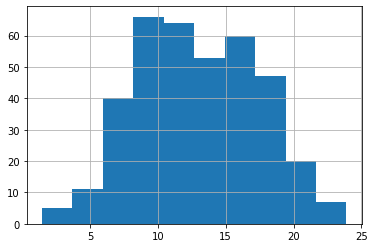

In [ ]:
heat.ave_dbh.hist()

In [ ]:
X = heat[["num_trees",'ave_dbh']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#The model did not improve. It seems that number of trees is more important than the average

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     29.42
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.38e-12
Time:                        13:53:11   Log-Likelihood:                -754.60
No. Observations:                 373   AIC:                             1515.
Df Residuals:                     370   BIC:                             1527.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0733      0.339      3.170      0.0

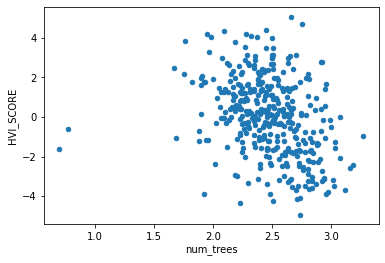

In [ ]:
ax = heat.plot("log_num_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("num_trees");

In [ ]:
X = heat[["log_num_trees"]].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     44.89
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.75e-11
Time:                        14:03:24   Log-Likelihood:                -760.82
No. Observations:                 373   AIC:                             1526.
Df Residuals:                     371   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1829      0.775      6.686      0.0

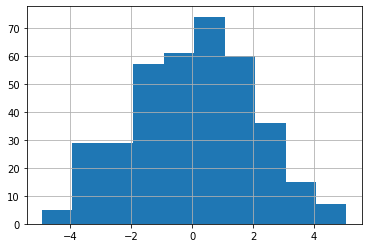

In [ ]:
heat.HVI_SCORE.hist()

In [ ]:
heat["dbh_trees"] = heat["ave_dbh"] * heat["num_trees"]
heat

,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh,log_num_trees,log_ave_dbh,dbh_trees
0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458,2.283301,1.166177,2815.000000
1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750,2.633468,1.298979,8559.472589
2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750,2.505150,1.024024,3382.000000
3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359,2.290035,1.151503,2764.000000
4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631,2.274158,1.160967,2723.486631
...,...,...,...,...,...,...,...,...
369,42101036203,-1.626316,"POLYGON ((-74.9648847150604 40.0772810971776, ...",291,13.536082,2.463893,1.131493,3939.000000
370,42101035302,-0.934188,"POLYGON ((-74.9875706652257 40.0758346996955, ...",168,1.476190,2.225309,0.169142,248.000000
371,42101036201,-1.094011,"POLYGON ((-74.9849887222353 40.0745340963154, ...",161,15.776398,2.206826,1.198008,2540.000000
372,42101036302,-1.194634,"POLYGON ((-74.9798960441206 40.0938200532625, ...",76,17.210526,1.880814,1.235794,1308.000000


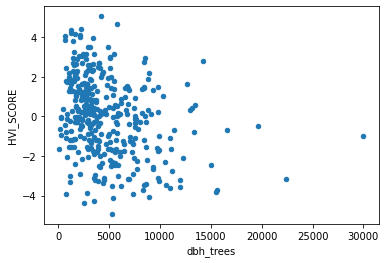

In [ ]:
ax = heat.plot("dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees");

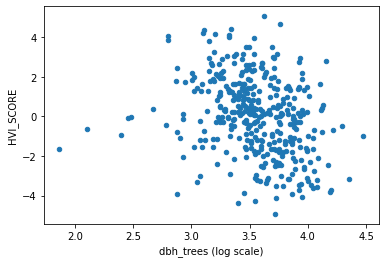

In [ ]:
heat["log_dbh_trees"] = np.log10(heat.dbh_trees)
ax = heat.plot("log_dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees (log scale)");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


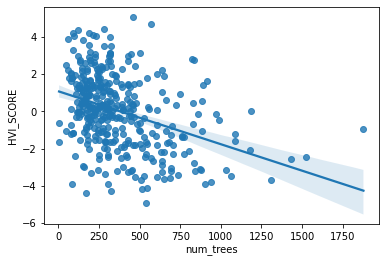

In [ ]:
import seaborn as sns
sns.regplot(heat['num_trees'], heat['HVI_SCORE']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


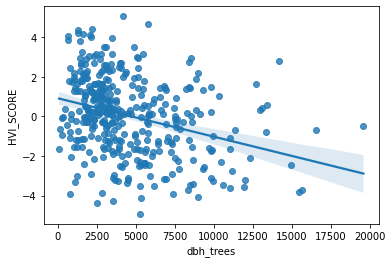

In [ ]:
import seaborn as sns
new = heat[heat['dbh_trees']<20000]

sns.regplot(new["dbh_trees"], new['HVI_SCORE']);

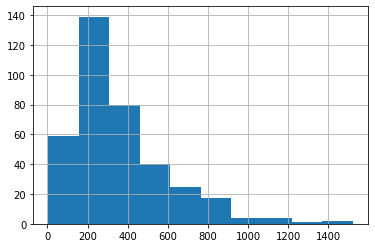

In [ ]:
new.num_trees.hist()

In [ ]:

#Regression 1 
#Dependent Variable: HVI_SCORE
#Independent Variables: ave_dbh , num_trees
import numpy as np
from sklearn.linear_model import LinearRegression

X = heat[['ave_dbh', 'num_trees']].values
y = heat[["HVI_SCORE"]].values

reg = LinearRegression().fit(X,y)
print("R-squared: {0:.4f}".format(reg.score(X,y)))
print("Coeficient 1: {0:.4f}".format(reg.coef_[0][0]))
print("Coeficient 2: {0:.4f}".format(reg.coef_[0][1]))
print("Intercept: {0:.4f}".format(reg.intercept_[0]))


R-squared: 0.1372
Coeficient 1: 0.0001
Coeficient 2: -0.0028
Intercept: 1.0733


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = heat[['ave_dbh', 'num_trees']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     29.42
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.38e-12
Time:                        13:47:46   Log-Likelihood:                -754.60
No. Observations:                 373   AIC:                             1515.
Df Residuals:                     370   BIC:                             1527.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0733      0.339      3.170      0.0

In [ ]:
X = heat[['dbh_trees']].values
y = heat[["HVI_SCORE"]].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     39.66
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           8.53e-10
Time:                        13:47:46   Log-Likelihood:                -763.18
No. Observations:                 373   AIC:                             1530.
Df Residuals:                     371   BIC:                             1538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8290      0.160      5.187      0.0

In [ ]:
X = heat[['log_dbh_trees', 'HVI_SCORE']].values
y = heat[["HVI_SCORE"]].values
#heat['HVI_SCORE'].values

**Correlation Model prediction of HVI Score and Number of trees with Health variables (Diseases)**

In [ ]:
#Loading a combined data of HVI Score, Number of Trees and Health Diseases. The data was joined using ArcGIS using spatial join of TractID
combined_data = pd.read_csv('/content/drive/Shareddrives/PUS2022/Heat_Trees_project/combined.csv')
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,HVI_SCORE,geometry,num_trees,ave_dbh
0,PA,Philadelphia,4260000,42101000100,4260000-42101000100,3478,5.4,"( 4.3, 7.5)",13.0,"(12.3, 13.9)",...,"(31.6, 35.5)",1.1,"( 1.0, 1.2)",5.5,"( 3.6, 8.6)","(39.95238276040, -75.1466628627)",-3.477334,"POLYGON ((-75.1414721327397 39.9517072267047, ...",1060.0,9.975472
1,PA,Philadelphia,4260000,42101000200,4260000-42101000200,2937,14.8,"(11.8, 18.0)",18.2,"(17.3, 19.2)",...,"(40.7, 44.1)",3.3,"( 2.9, 3.7)",14.5,"( 7.4, 22.6)","(39.95539990180, -75.1569774999)",1.652408,"POLYGON ((-75.162377698504 39.9576545523082, -...",252.0,9.106000
2,PA,Philadelphia,4260000,42101000300,4260000-42101000300,3169,6.2,"( 5.0, 7.8)",18.2,"(17.4, 19.0)",...,"(32.3, 35.2)",1.9,"( 1.7, 2.2)",6.8,"( 4.3, 10.8)","(39.95710584440, -75.1709368581)",-1.576464,"POLYGON ((-75.1782048283904 39.9598134132842, ...",1086.0,8.928177
3,PA,Philadelphia,4260000,42101000401,4260000-42101000401,2125,7.7,"( 5.8, 10.1)",19.6,"(18.9, 20.5)",...,"(34.2, 37.3)",2.5,"( 2.3, 2.8)",9.2,"( 6.0, 13.1)","(39.95413660830, -75.1765601839)",-1.554901,"POLYGON ((-75.1729917788024 39.9546437050483, ...",253.0,6.106719
4,PA,Philadelphia,4260000,42101000402,4260000-42101000402,3142,5.8,"( 4.7, 7.2)",29.0,"(27.5, 30.8)",...,"(28.7, 31.6)",3.1,"( 2.6, 3.7)",6.4,"( 3.8, 11.2)","(39.95329732390, -75.1686952355)",0.232113,"POLYGON ((-75.1633313650233 39.9533392100125, ...",393.0,5.877303


In [ ]:
#Checking variables in the combined dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               376 non-null    object 
 1   PlaceName               376 non-null    object 
 2   PlaceFIPS               376 non-null    int64  
 3   TractFIPS               376 non-null    int64  
 4   Place_TractID           376 non-null    object 
 5   Population2010          376 non-null    int64  
 6   ACCESS2_CrudePrev       376 non-null    float64
 7   ACCESS2_Crude95CI       376 non-null    object 
 8   ARTHRITIS_CrudePrev     376 non-null    float64
 9   ARTHRITIS_Crude95CI     376 non-null    object 
 10  BINGE_CrudePrev         376 non-null    float64
 11  BINGE_Crude95CI         376 non-null    object 
 12  BPHIGH_CrudePrev        376 non-null    float64
 13  BPHIGH_Crude95CI        376 non-null    object 
 14  BPMED_CrudePrev         376 non-null    fl

In [ ]:
combined_data.describe()

,PlaceFIPS,TractFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,...,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,HVI_SCORE,num_trees,ave_dbh
count,376.0,3.760000e+02,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,375.000000,374.000000,374.000000,374.000000
mean,4260000.0,4.210103e+10,4058.377660,13.434309,25.765160,20.179521,34.295479,74.481383,5.809043,11.589096,...,16.168617,33.205585,81.397606,14.893085,42.241489,4.093883,19.860800,0.013235,388.957219,12.928795
std,0.0,9.958006e+04,1625.805143,5.792134,6.111099,4.587412,9.248421,7.225807,1.830824,1.809077,...,3.726829,8.095460,2.848432,4.398158,5.865477,1.734325,8.798686,1.995821,478.637155,4.388298
min,4260000.0,4.210100e+10,74.000000,4.100000,6.500000,8.500000,10.800000,33.500000,1.100000,8.200000,...,8.200000,17.400000,65.100000,5.000000,28.800000,0.700000,3.800000,-6.188905,5.000000,1.476190
25%,4260000.0,4.210101e+10,2889.250000,9.175000,22.950000,16.500000,28.800000,71.900000,4.700000,10.100000,...,13.400000,26.200000,79.700000,11.875000,37.000000,2.900000,12.600000,-1.365208,190.250000,9.611777
50%,4260000.0,4.210102e+10,3944.500000,12.700000,26.250000,19.300000,33.300000,75.300000,5.600000,11.400000,...,16.000000,32.950000,81.600000,14.600000,42.850000,3.800000,19.000000,0.121218,297.000000,12.735011
75%,4260000.0,4.210103e+10,5129.000000,16.200000,29.750000,23.400000,42.350000,79.425000,6.600000,13.100000,...,19.000000,40.600000,83.500000,18.200000,47.200000,5.200000,26.600000,1.415511,463.000000,16.330889
max,4260000.0,4.210199e+10,8322.000000,35.300000,50.900000,33.600000,56.400000,89.600000,18.700000,16.300000,...,25.800000,48.800000,86.000000,24.800000,52.600000,10.300000,42.400000,5.062507,8177.000000,23.890026


In [ ]:
#Clipping the variables that will be used in the modelling based on the influence in the modelling
combined_1 = combined_data[['Population2010', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'DIABETES_CrudePrev', 'OBESITY_CrudePrev', 'OBESITY_CrudePrev', 'HVI_SCORE', 'num_trees', 'geometry']]
combined_1.head()

,Population2010,BPHIGH_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,OBESITY_CrudePrev,HVI_SCORE,num_trees,geometry
0,3478,15.6,3.8,8.8,3.8,20.7,20.7,-3.477334,1060.0,"POLYGON ((-75.1414721327397 39.9517072267047, ..."
1,2937,28.8,3.6,8.6,13.4,23.4,23.4,1.652408,252.0,"POLYGON ((-75.162377698504 39.9576545523082, -..."
2,3169,21.8,5.7,9.0,6.1,21.4,21.4,-1.576464,1086.0,"POLYGON ((-75.1782048283904 39.9598134132842, ..."
3,2125,26.3,5.7,8.9,9.2,21.6,21.6,-1.554901,253.0,"POLYGON ((-75.1729917788024 39.9546437050483, ..."
4,3142,31.6,10.7,8.4,9.0,19.7,19.7,0.232113,393.0,"POLYGON ((-75.1633313650233 39.9533392100125, ..."


**Correlation Model prediction**

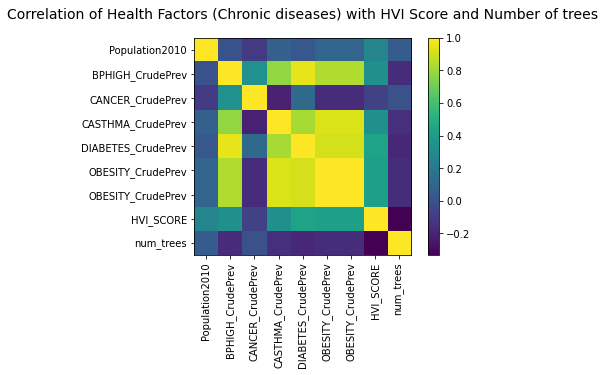

In [ ]:
#Running the correction model
plt.imshow(combined_1.corr())
plt.xticks(range(len(combined_1.corr())), combined_1.corr().columns, rotation='vertical')
plt.yticks(range(len(combined_1.corr())), combined_1.corr().columns)
plt.title("Correlation of Health Factors (Chronic diseases) with HVI Score and Number of trees", fontsize = 14, pad=20)
plt.colorbar();

Correlation between different health variables, HVI Score and Number of trees. There are two things from this analysis. Firstly, we learn that HVI Scores are associated with low Number of trees. This means that the less the trees in the census tract the high the heating effect. Secondly, we notice that High Blood  Pressure is also associated with low Number of trees. This indicates that in areas where the trees are feel, there is high occurence of High Blood Pressure.

**Random Forest Modelling: HVI Score prediction with health variables with number of trees**

In [ ]:
x = combined_data[['Population2010', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'DIABETES_CrudePrev', 'OBESITY_CrudePrev', 'OBESITY_CrudePrev', 'num_trees']]
y = combined_data[['HVI_SCORE']]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)


In [ ]:
#Running the RF Model
rf = RandomForestRegressor(max_depth=8, random_state=1, n_estimators=500, max_leaf_nodes = 30, min_samples_leaf = 50)
rf.fit(X_train, y_train,)

<ipython-input-103-f010f3f53349>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train,)


RandomForestRegressor(max_depth=8, max_leaf_nodes=30, min_samples_leaf=50,
                      n_estimators=500, random_state=1)

In [ ]:
#Creating feature names
names = list(x.columns.values.tolist())

feature_names = np.array(names)

feature_names

array(['Population2010', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev',
       'CASTHMA_CrudePrev', 'DIABETES_CrudePrev', 'OBESITY_CrudePrev',
       'OBESITY_CrudePrev', 'num_trees'], dtype='<U18')

Text(0.5, 0, 'Random Forest Feature Importance')

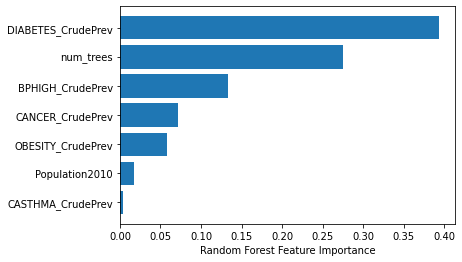

In [ ]:
#Running a RF feature importance
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Importance on the prediction of HVI Score for each input variable (Diseases), with the inclusion of Number of trees. Based on our model analysis, Diabetes, Number of trees and High Blood Pressure are the variables that have highly influence on HVI Score. And population with a lower influnce on the HVI Score in the census tracts. These results indicate that the less the number of trees the more heating effect is experienced in the areas. And the more HVI Score is, the high the disease such as Diabetes and High Blood Pressure. These results are similar with the correlation analysis done above. 

**End of Modelling and Analysis** 

**Data Science is Fun**